In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
rl2_bicameral_train = pd.read_csv('../logs/rl2_eval/bicameral_eval/24_03_10_57_59/train_results.csv')
rl2_bicameral_test = pd.read_csv('../logs/rl2_eval/bicameral_eval/24_03_10_57_59/test_results.csv')
rl2_double_train = pd.read_csv('../logs/rl2_eval/double_eval/24_03_14_44_46/train_results.csv')
rl2_double_test = pd.read_csv('../logs/rl2_eval/double_eval/24_03_14_44_46/test_results.csv')

<Axes: xlabel='tasks', ylabel='mean_rewards'>

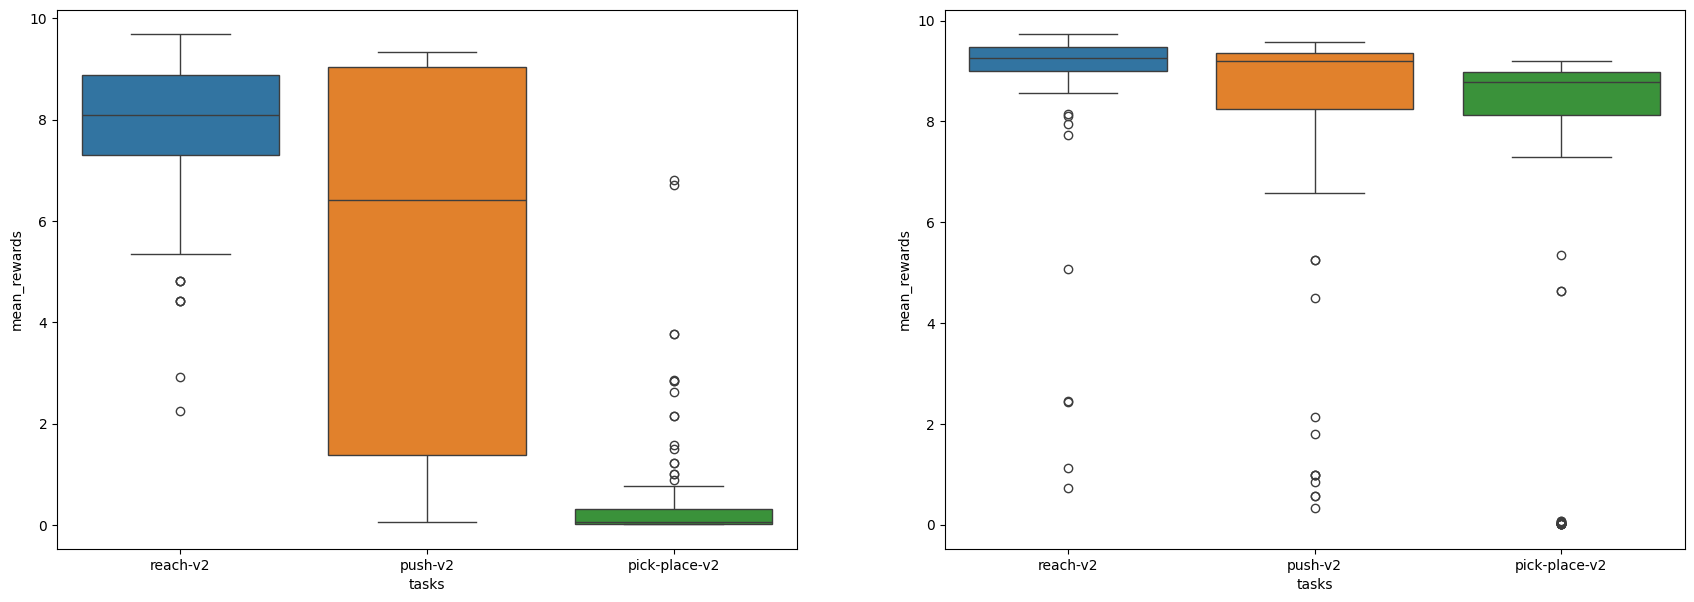

In [91]:
fig, ax = plt.subplots(
    1,2, figsize=(21, 7)
)
sns.boxplot(
    rl2_bicameral_train,
    x='tasks',
    y='mean_rewards',
    hue='tasks',
    ax=ax[0]
)
sns.boxplot(
    rl2_double_train,
    x='tasks',
    y='mean_rewards',
    hue='tasks',
    ax=ax[1]
)

In [101]:
(
    rl2_double_test
    .query('tasks=="pick-place-v2"')
    .query('mean_rewards>0.5')
    .shape[0]
)

19

In [99]:
(
    rl2_double_test
    .query('tasks=="reach-v2"')
    .query('mean_rewards<4')
    .shape[0]
)

21

In [109]:
(
    rl2_bicameral_test
    .groupby('tasks')
    .agg({
    'mean_rewards':['mean','median','std'],
    'successes':'mean'
})
)

mean_rewards                     successes
                        mean    median       std      mean
tasks                                                     
bin-picking-v2      0.028830  0.022700  0.017703      0.00
button-press-v2     0.122025  0.113008  0.031348      0.00
door-open-v2        0.976633  0.923346  0.241749      0.00
faucet-open-v2      2.648500  2.607993  0.210542      0.01
pick-place-v2       0.036424  0.014899  0.176117      0.01
push-v2             0.382908  0.053486  1.082054      0.04
push-wall-v2        0.207535  0.061145  0.653258      0.02
reach-v2            5.989329  5.595850  1.637140      0.22
reach-wall-v2       5.783473  5.452671  1.254791      0.19

In [108]:
(
    rl2_double_test
    .groupby('tasks')
    .agg({
        'mean_rewards':['mean','median','std'],
        'successes':'mean'
    })
)

mean_rewards                     successes
                        mean    median       std      mean
tasks                                                     
bin-picking-v2      0.004368  0.003913  0.001122      0.00
button-press-v2     0.285844  0.287728  0.040563      0.00
door-open-v2        0.432584  0.350310  0.212202      0.00
faucet-open-v2      2.296338  2.300339  0.138521      0.00
pick-place-v2       0.861669  0.016082  2.122829      0.15
push-v2             6.223194  7.729730  3.326329      0.66
push-wall-v2        1.654173  0.650239  2.449799      0.20
reach-v2            7.051186  8.371922  2.957066      0.33
reach-wall-v2       7.954449  8.636064  2.037889      0.36

In [112]:
[i for i in range(0,20)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [120]:
(
    rl2_double_test
    .query('tasks=="pick-place-v2"')
    .successes.sum()
)

15.0

In [20]:
(
    rl2_double_test
    .groupby(
        ['successes', 'tasks']
    ).mean()
)

Unnamed: 0   episode  mean_rewards
successes tasks                                              
0.0       bin-picking-v2     9.500000  0.500000      0.004368
          button-press-v2   11.500000  0.500000      0.285844
          door-open-v2      10.500000  0.500000      0.432584
          faucet-open-v2    12.500000  0.500000      2.296338
          pick-place-v2      5.917647  0.435294      0.187649
          push-v2            5.235294  0.470588      3.490826
          push-wall-v2       8.162500  0.462500      0.813645
          reach-v2           4.567164  0.507463      5.922797
          reach-wall-v2      7.781250  0.531250      7.380642
1.0       pick-place-v2      9.800000  0.866667      4.681115
          push-v2            5.636364  0.515152      7.630777
          push-wall-v2       9.850000  0.650000      5.016285
          reach-v2           4.363636  0.484848      9.342156
          reach-wall-v2      7.000000  0.444444      8.974551

In [22]:
(
    rl2_double_test
    .query('episode==1')
    .groupby(
        ['tasks']
    ).mean()
)

,Unnamed: 0,episode,mean_rewards,successes
tasks,,,,
bin-picking-v2,14.0,1.0,0.004381,0.00
button-press-v2,16.0,1.0,0.271443,0.00
door-open-v2,15.0,1.0,0.459465,0.00
faucet-open-v2,17.0,1.0,2.249615,0.00
pick-place-v2,11.0,1.0,1.607865,0.26
push-v2,10.0,1.0,6.990742,0.68
push-wall-v2,13.0,1.0,2.134477,0.26
reach-v2,9.0,1.0,6.945957,0.32
reach-wall-v2,12.0,1.0,7.897905,0.32


In [8]:
pd.merge(
    rl2_bicameral_train.assign(run_name='bicameral'),
    rl2_double_train.assign(run_name='double'),
    on = ['tasks', 'episode']
)

,Unnamed: 0_x,tasks,episode,mean_rewards_x,successes_x,run_name_x,Unnamed: 0_y,mean_rewards_y,successes_y,run_name_y
0,0,reach-v2,0,7.969930,0.0,bicameral,0,9.636552,1.0,double
1,0,reach-v2,0,7.969930,0.0,bicameral,0,8.853368,1.0,double
2,0,reach-v2,0,7.969930,0.0,bicameral,0,1.123198,0.0,double
3,0,reach-v2,0,7.969930,0.0,bicameral,0,9.219501,1.0,double
4,0,reach-v2,0,7.969930,0.0,bicameral,0,9.614975,1.0,double
...,...,...,...,...,...,...,...,...,...,...
14995,5,pick-place-v2,1,0.308152,1.0,bicameral,5,8.972755,1.0,double
14996,5,pick-place-v2,1,0.308152,1.0,bicameral,5,8.957001,1.0,double
14997,5,pick-place-v2,1,0.308152,1.0,bicameral,5,0.044106,0.0,double
14998,5,pick-place-v2,1,0.308152,1.0,bicameral,5,9.132908,1.0,double


In [80]:
import torch
import numpy as np
num_proc = 10
num_times = 10
successes = []
alt_num_succ = torch.zeros((num_proc, 2))

for t in range(num_times):
    raw_succ = torch.tensor(np.random.choice([0,1],10, p=[0.9, 0.1]),dtype=torch.float)
    successes.append(raw_succ)
    alt_num_succ[range(num_proc), 0] += raw_succ.view(-1)
# torch.stack([[1,1,1,0,0,0],[0,0,0,0,0,0], [1,0,1,0,1,0]])

In [ ]:
successes.append(torch.tensor([i['success'] for i in info]))

In [ ]:
torch.stack(successes).max(0)[0].mean()

In [81]:
torch.stack(successes)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [88]:
alt_num_succ[:,0] / (alt_num_succ[:,0] + 1.0e-10) == torch.stack(successes).max(0)[0]

tensor([True, True, True, True, True, True, True, True, True, True])

In [76]:
task_successes = torch.stack(successes).max(0)
task_successes

torch.return_types.max(
values=tensor([0., 0., 0., 1., 1., 1., 1., 0., 1., 1.]),
indices=tensor([0, 0, 0, 0, 2, 6, 5, 0, 5, 5]))

In [74]:
torch.stack(successes).max(0)[0].mean() ## this seems right

tensor(0.6000)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])